## Veri görselleştirme

### Gerekli kütüphaneleri yükle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### SoH Analizi

In [ ]:
soh_df = pd.read_csv("./data/processed/battery_data_soh.csv")

# İlk birkaç satıra göz at
soh_df.head(15)


,battery_id,cycle,capacity,soh,avg_voltage,avg_current,avg_temperature,max_temperature
0,B0005,1,1.856487,1.000000,3.529829,-1.818702,32.572328,38.982181
1,B0005,3,1.846327,0.994527,3.537320,-1.817560,32.725235,39.033398
2,B0005,5,1.835349,0.988614,3.543737,-1.816487,32.642862,38.818797
3,B0005,7,1.835263,0.988567,3.543666,-1.825589,32.514876,38.762305
4,B0005,9,1.834646,0.988235,3.542343,-1.826114,32.382349,38.665393
5,B0005,11,1.835662,0.988782,3.541335,-1.816811,32.434182,38.751695
6,B0005,13,1.835146,0.988504,3.541025,-1.816791,32.480416,38.820701
7,B0005,15,1.825757,0.983447,3.554133,-1.844341,32.410462,38.517130
8,B0005,17,1.824774,0.982917,3.552936,-1.853973,32.346141,38.526268
9,B0005,19,1.824613,0.982831,3.551206,-1.853590,32.276798,38.526981


In [3]:
# Betimleyici istatistikler
soh_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cycle,468.0,256.412393,173.789009,1.000000,109.750000,234.500000,390.000000,613.000000
capacity,468.0,1.559119,0.206228,1.153818,1.387719,1.524251,1.742572,2.035338
soh,468.0,0.813728,0.113268,0.566893,0.729705,0.800421,0.916427,1.000000
avg_voltage,468.0,3.491822,0.049540,3.403885,3.456647,3.494967,3.534883,3.573551
avg_current,468.0,-1.806614,0.104137,-1.999755,-1.889296,-1.806314,-1.733999,-1.516972
avg_temperature,468.0,32.313125,1.076993,30.102704,31.331219,32.304421,33.320027,34.490494
max_temperature,468.0,39.259500,1.468938,36.372088,38.038990,38.989287,40.749505,42.007540


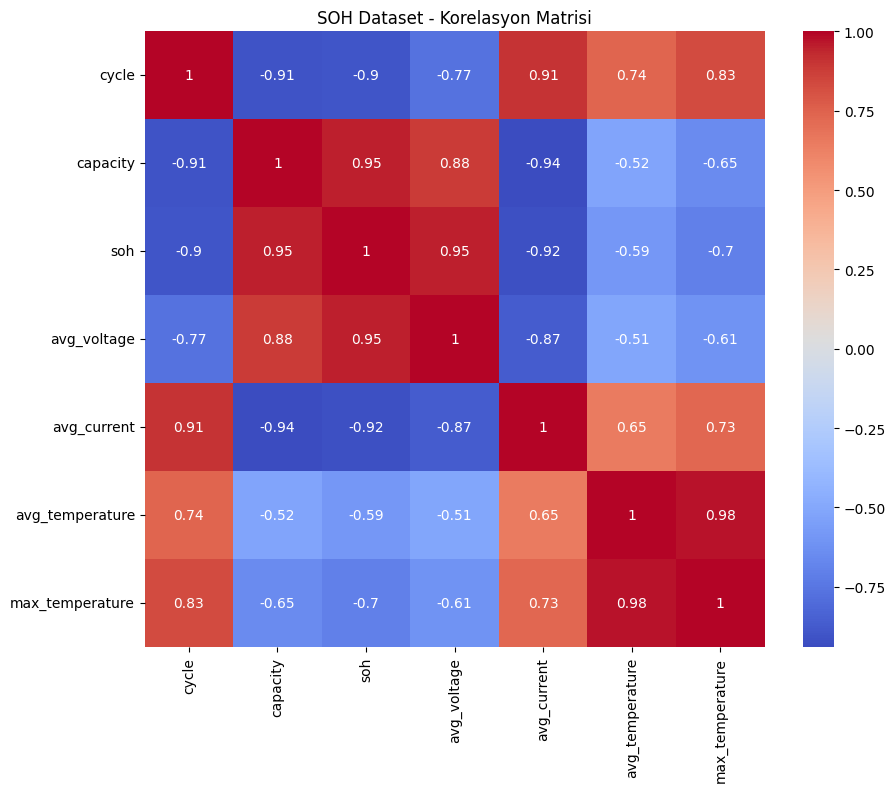

In [4]:
# Korelasyon matrisi
# Sadece sayısal sütunları seçerek korelasyon matrisi oluştur
numeric_cols = soh_df.select_dtypes(include='number')
corr =numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("SOH Dataset - Korelasyon Matrisi")
plt.show()

In [5]:
corr

,cycle,capacity,soh,avg_voltage,avg_current,avg_temperature,max_temperature
cycle,1.000000,-0.908945,-0.902096,-0.769678,0.906810,0.736437,0.830045
capacity,-0.908945,1.000000,0.948643,0.879654,-0.940896,-0.518853,-0.646042
soh,-0.902096,0.948643,1.000000,0.951148,-0.922633,-0.585955,-0.701431
avg_voltage,-0.769678,0.879654,0.951148,1.000000,-0.870341,-0.513493,-0.613205
avg_current,0.906810,-0.940896,-0.922633,-0.870341,1.000000,0.646478,0.733641
avg_temperature,0.736437,-0.518853,-0.585955,-0.513493,0.646478,1.000000,0.975346
max_temperature,0.830045,-0.646042,-0.701431,-0.613205,0.733641,0.975346,1.000000


### 📌 Öne Çıkan İlişkiler

- **SOH & Capacity:** `+0.95` → Güçlü pozitif ilişki, kapasite SOH'un iyi bir göstergesidir.
- **SOH & Avg Voltage:** `+0.95` → Yüksek voltaj, daha yüksek SOH ile ilişkilidir.
- **SOH & Avg Current:** `-0.92` → Artan akım, SOH'un düşmesine neden olur.
- **SOH & Max Temperature:** `-0.70` → Yüksek sıcaklıklar SOH’u olumsuz etkiler.

### 🌡️ Sıcaklık Değişkenleri
- **Avg Temp & Max Temp:** `+0.98` → Birbirine çok yakın değişkenler, dikkatli kullanılmalı (multicollinearity riski).

### 🔁 Döngü Sayısı
- **Cycle & SOH:** `-0.90` → Döngü arttıkça batarya sağlığı azalır.
- **Cycle & Avg Current:** `+0.91` → Kullanım arttıkça ortalama akım da artar.


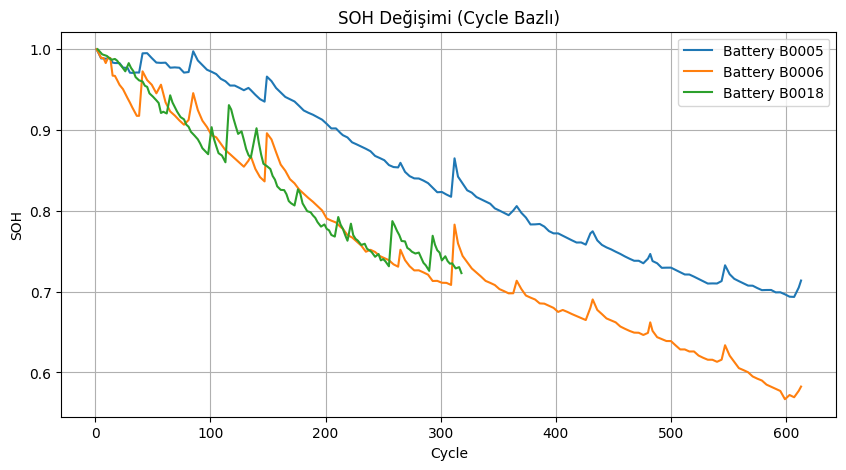

In [6]:
# Kapasite ve SOH değişimi
plt.figure(figsize=(10, 5))
for bat_id in soh_df['battery_id'].unique():
    bat_data = soh_df[soh_df['battery_id'] == bat_id]
    plt.plot(bat_data['cycle'], bat_data['soh'], label=f'Battery {bat_id}')
plt.xlabel('Cycle')
plt.ylabel('SOH')
plt.title('SOH Değişimi (Cycle Bazlı)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.feature_selection import mutual_info_regression

X = soh_df[['avg_voltage', 'avg_current', 'avg_temperature', 'max_temperature']]
y = soh_df['soh']
mi = mutual_info_regression(X, y)
print(dict(zip(X.columns, mi)))

{'avg_voltage': 1.7738147609991928, 'avg_current': 1.8658046322874715, 'avg_temperature': 0.7340677054702938, 'max_temperature': 0.8954207858333976}


📊 Mutual Information (MI) Yorumu

Mutual information (karşılıklı bilgi), bir değişkenin hedef değişken (burada soh) hakkında ne kadar bilgi sağladığını ölçer. Değer ne kadar yüksekse, değişkenin hedef üzerinde etkisi o kadar fazladır.

📌 Sonuçlar:
Özellik	MI Skoru	Yorum
avg_current	1.87	En yüksek bilgi katkısı → SoH tahmininde çok değerli.
avg_voltage	1.77	Çok güçlü bilgi taşıyor, SoH ile fiziksel olarak da anlamlı ilişkisi var.
max_temperature	0.89	Orta düzeyde katkı → özellikle sıcaklık stresinin etkisini yansıtıyor.
avg_temperature	0.73	En düşük MI → max_temperature ile birlikte veri tekrarına neden olabilir.
✅ Özellik Seçimi Önerisi

Model için aşağıdaki 3 özelliği kullanman en mantıklısı olur:

avg_current
avg_voltage
max_temperature
avg_temperature hem korelasyon hem MI açısından daha zayıf olduğu için dışarıda bırakılabilir.
capacity ve soh aynı bilgiyi taşıdığı için, sadece soh hedef olarak kalmalı.

### SoC Analizi

In [ ]:
soc_df = pd.read_csv("./data/processed/battery_data_soc.csv")

# İlk birkaç satır
print(soc_df.head(15))

   battery_id  cycle     time   voltage   current  temperature       soc
0       B0005      1    0.000  4.191492 -0.004902    24.330034  1.000000
1       B0005      1   16.781  4.190749 -0.001478    24.325993  0.999996
2       B0005      1   35.703  3.974871 -2.012528    24.389085  0.994298
3       B0005      1   53.781  3.951717 -2.013979    24.544752  0.988851
4       B0005      1   71.922  3.934352 -2.011144    24.731385  0.983392
5       B0005      1   90.094  3.920058 -2.013007    24.909816  0.977918
6       B0005      1  108.281  3.907904 -2.014400    25.105884  0.972437
7       B0005      1  126.453  3.897036 -2.011603    25.317019  0.966967
8       B0005      1  144.641  3.887477 -2.018015    25.509423  0.961475
9       B0005      1  162.844  3.878959 -2.013135    25.703603  0.955992
10      B0005      1  181.016  3.871016 -2.013162    25.887208  0.950519
11      B0005      1  199.219  3.863480 -2.013030    26.077815  0.945036
12      B0005      1  217.391  3.856661 -2.013710  

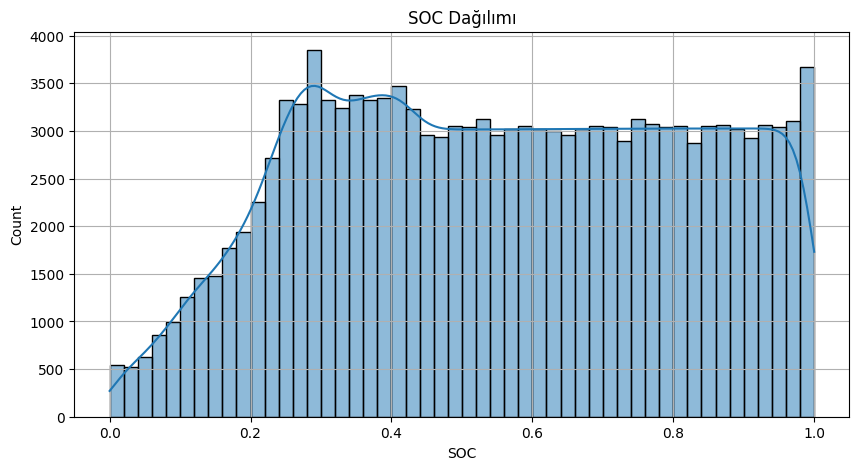

In [8]:
# SOC dağılımı
plt.figure(figsize=(10, 5))
sns.histplot(soc_df['soc'], bins=50, kde=True)
plt.title("SOC Dağılımı")
plt.xlabel("SOC")
plt.grid(True)
plt.show()

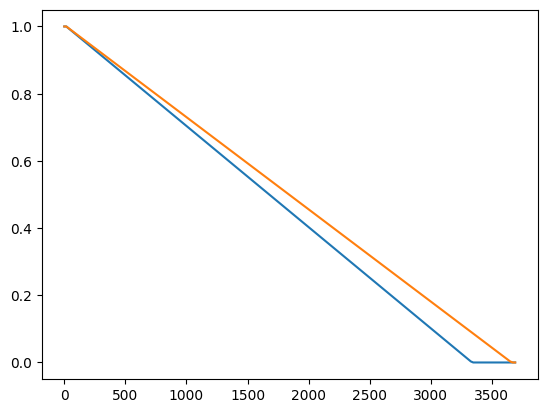

In [ ]:
# Zaman içindeki SOC örneği
for bat in soc_df['battery_id'].unique():
    bat_data = soc_df[(soc_df['battery_id'] == bat) & (soc_df['cycle'] == 1)]
    plt.plot(bat_data['time'], bat_data['soc'], label=f'Battery {bat}')
